<a href="https://colab.research.google.com/github/maheenfatimacse/pythonDA/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of the model would be to accurately forecast the future closing price of the stock based on historical patterns and trends observed in the provided dataset.

IMPORT THE REQUIRED LIBRARIES

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

LOAD AND PREPROCESS THE DATA

In [87]:
#load the stock data from a csv file
stockprice_ds = pd.read_csv('/content/NFLX.csv')

In [88]:
stockprice_ds.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [89]:
stockprice_ds.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


**PROMBLEM** STATEMENT

Given a dataset with stock data including Date, Open, High, Low, Close, Adjusted Close, and Volume, the goal is to create a model that can predict the closing price of the stock for the next trading day. By using historical values of Open, High, Low, Close, Adjusted Close, and Volume as inputs, the model should make accurate predictions. The model's performance will be evaluated using a metric called mean absolute error (MAE) to measure how close the predicted closing prices are to the actual closing prices.

In [90]:
#convert date column to datetime format
stockprice_ds['Date'] = pd.to_datetime(stockprice_ds['Date'])

In [91]:
#sort the data by date in ascending order
stockprice_ds.sort_values(by = 'Date',inplace = True)

In [92]:
stockprice_ds['Date'].dtypes

dtype('<M8[ns]')

In [93]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Convert the string column to numerical representation
stockprice_ds['Date'] = label_encoder.fit_transform(stockprice_ds['Date'])


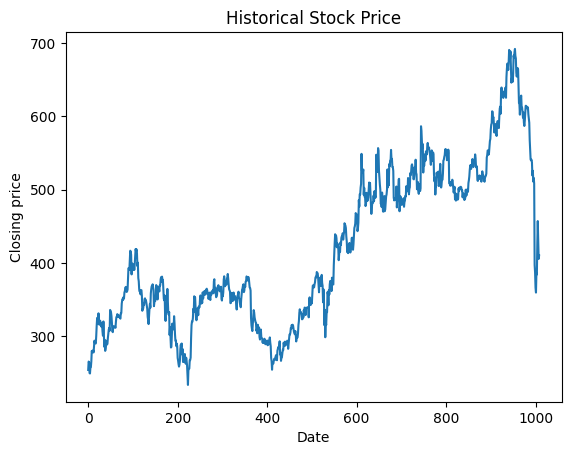

In [94]:
#visualize the historical stock price
plt.plot(stockprice_ds['Date'],stockprice_ds['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Historical Stock Price')
plt.show()

SPLITTING THE DATA SET

In [95]:
X = stockprice_ds.drop(['Close'],axis = 1)
y = stockprice_ds['Close']

In [96]:
X

,Date,Open,High,Low,Adj Close,Volume
0,0,262.000000,267.899994,250.029999,254.259995,11896100
1,1,247.699997,266.700012,245.000000,265.720001,12595800
2,2,266.579987,272.450012,264.329987,264.559998,8981500
3,3,267.079987,267.619995,250.000000,250.100006,9306700
4,4,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,1004,401.970001,427.700012,398.200012,427.140015,20047500
1005,1005,432.959991,458.480011,425.540009,457.130005,22542300
1006,1006,448.250000,451.980011,426.480011,429.480011,14346000
1007,1007,421.440002,429.260010,404.279999,405.600006,9905200


In [97]:
y

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [98]:
#splitting the data into training and testing data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

TRAINING THE MODEL

In [99]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [100]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test,predictions)

In [101]:
print("mean absolute error : ",mae)

mean absolute error :  8.357670990920782e-14


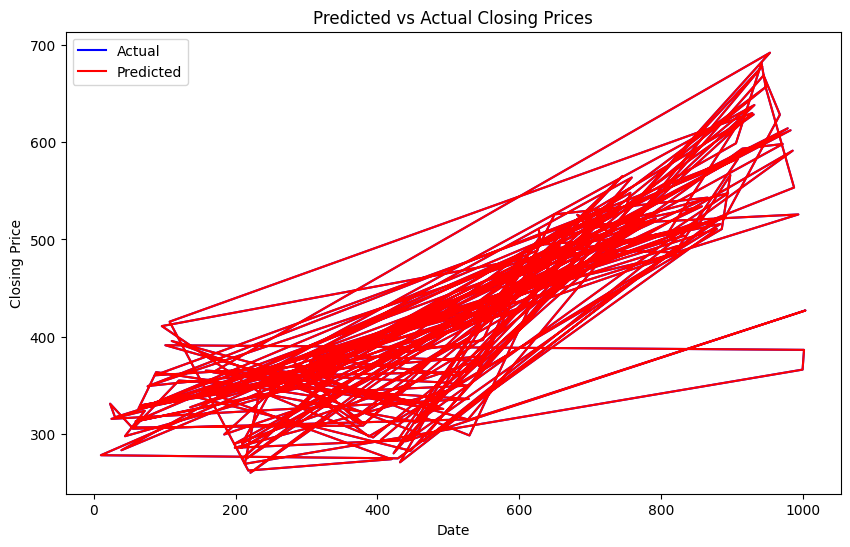

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(stockprice_ds['Date'].iloc[X_test.index], y_test,color = 'blue', label='Actual')
plt.plot(stockprice_ds['Date'].iloc[X_test.index], predictions,color = 'red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Predicted vs Actual Closing Prices')
plt.legend()
plt.show()


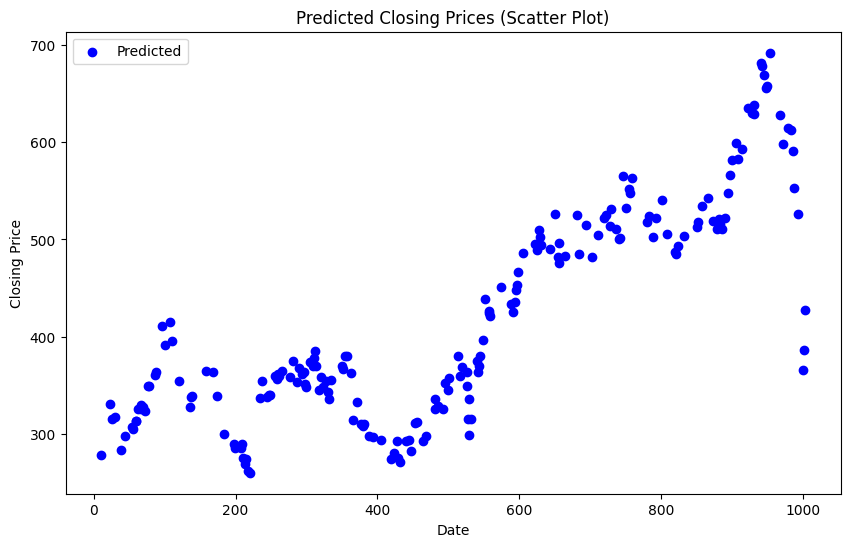

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(stockprice_ds['Date'].iloc[X_test.index], predictions, color='blue', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Predicted Closing Prices (Scatter Plot)')
plt.legend()
plt.show()
